In [1]:
pip install opencv-python-headless

DEPRECATION: Loading egg at /Users/vaibhavvv/anaconda3/lib/python3.11/site-packages/frozendict-2.3.0-py3.10.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
Note: you may need to restart the kernel to use updated packages.


In [9]:
import os
print("Notebook directory:", os.getcwd())

print("yolov4.weights exists:", os.path.exists("yolov4.weights"))
print("yolov4.cfg exists:", os.path.exists("yolov4.cfg"))


Notebook directory: /Users/vaibhavvv
yolov4.weights exists: True
yolov4.cfg exists: True


### 

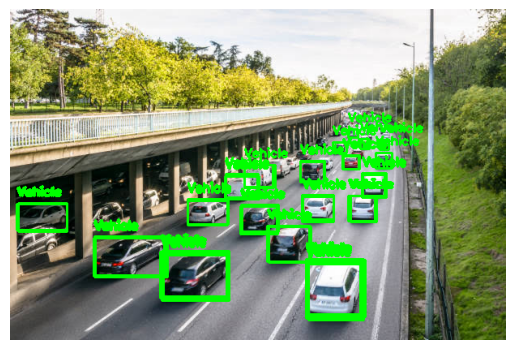

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

# Specify paths to YOLO files
weights_path = os.path.abspath("yolov4.weights")
cfg_path = os.path.abspath("yolov4.cfg")
coco_names_path = os.path.abspath("coco.names")
image_path = os.path.abspath("traffic3.jpg")

# Load YOLO pre-trained model for vehicle detection
net = cv2.dnn.readNet(weights_path, cfg_path)

# Load the COCO names file (contains class names)
classes = []
with open(coco_names_path, "r") as f:
    classes = f.read().strip().split("\n")

# Load the image
image = cv2.imread(image_path)
height, width, _ = image.shape

# Preprocess the image for YOLO
blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)

# Get output layer names
output_layers = net.getUnconnectedOutLayersNames()

# Perform forward pass and get detections
detections = net.forward(output_layers)

# Loop through detections
for detection in detections:
    for obj in detection:
        scores = obj[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        
        # Class ID for cars in COCO is 2
        if confidence > 0.5 and class_id == 2:
            center_x = int(obj[0] * width)
            center_y = int(obj[1] * height)
            w = int(obj[2] * width)
            h = int(obj[3] * height)
            
            # Calculate the coordinates for the rectangle
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            
            # Draw bounding box and label
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(image, "Vehicle", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Convert BGR to RGB for matplotlib display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image in Jupyter Notebook
plt.imshow(image_rgb)
plt.axis("off")
plt.show()


In [6]:
def adjust_green_signal_time(vehicle_count):
    base_green_time = 30  # Base green time in seconds
    vehicle_multiplier = 2  # Green time increases by 2 seconds per vehicle
    
    green_time = base_green_time + (vehicle_count * vehicle_multiplier)
    return green_time

def main():
    try:
        with open("vehicle_count.txt", "r") as file:
            vehicle_count = int(file.read())
            
            if vehicle_count < 0:
                print("Invalid vehicle count in the file. Please ensure the count is a non-negative integer.")
                return
        
        green_time = adjust_green_signal_time(vehicle_count)
        print("Adjusted Green Signal Time:", green_time, "seconds")
    except (ValueError, FileNotFoundError):
        print("Error reading vehicle count from file.")

if __name__ == "__main__":
    main()


Error reading vehicle count from file.
